## Import Required Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
df = pd.read_csv("./data/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df = df[df["ocean_proximity"] != "ISLAND"]

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,-119.570986,35.633778,28.629724,2636.764147,537.899305,1425.132220,499.488007,3.871437,206821.928432
std,2.003732,2.136312,12.590156,2185.451409,421.425970,1133.277418,382.326831,1.899432,115412.337452
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563400,119475.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.537500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.250000,647.000000,1723.000000,604.000000,4.744075,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split

x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
df_train = X_train.join(y_train)

In [14]:
def transform_data(df):
    df_t = df.copy()
    for column in ["total_rooms", "total_bedrooms", "population", "households"]:
        df_t[column] = np.log(df_t[column] + 1)
    df_t = df_t.join(pd.get_dummies(df_t["ocean_proximity"])).drop(
        "ocean_proximity", axis=1
    )
    df_t["bedrooms_per_room"] = df_t["total_bedrooms"] / df_t["total_rooms"]
    df_t["household_room"] = df_t["households"] / df_t["total_rooms"]
    return df_t

## Data Visualization

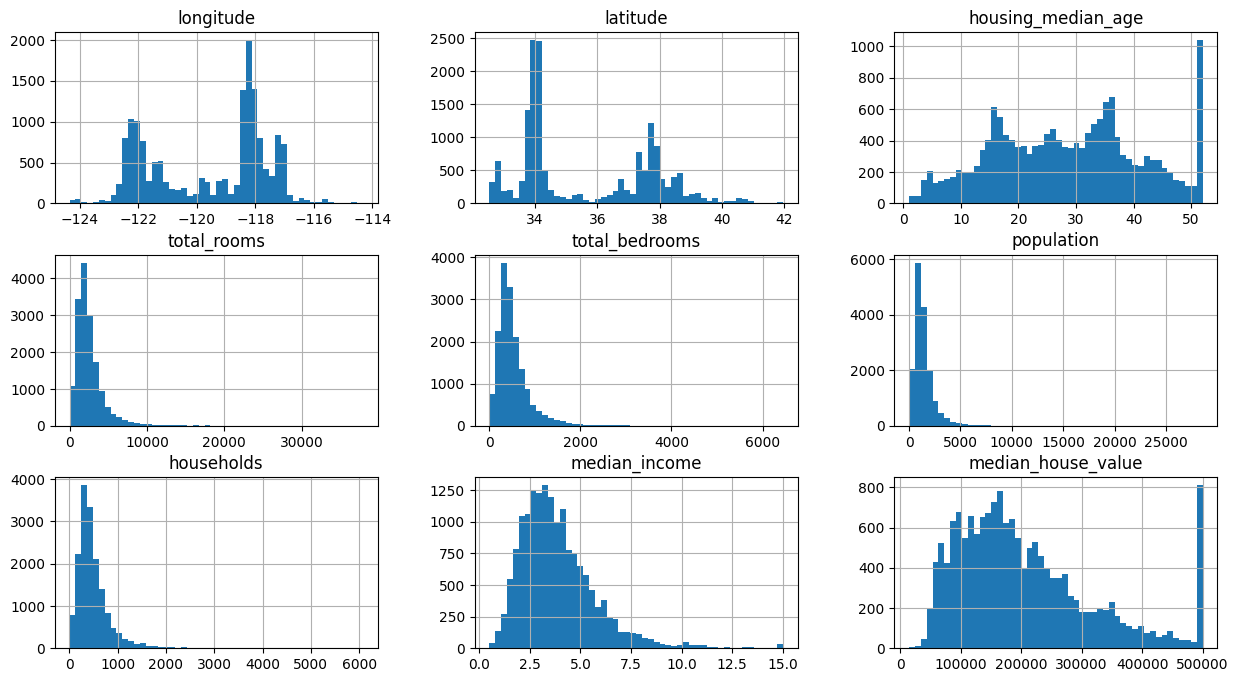

In [15]:
df_train.hist(figsize=(15, 8), bins=50)
plt.show()

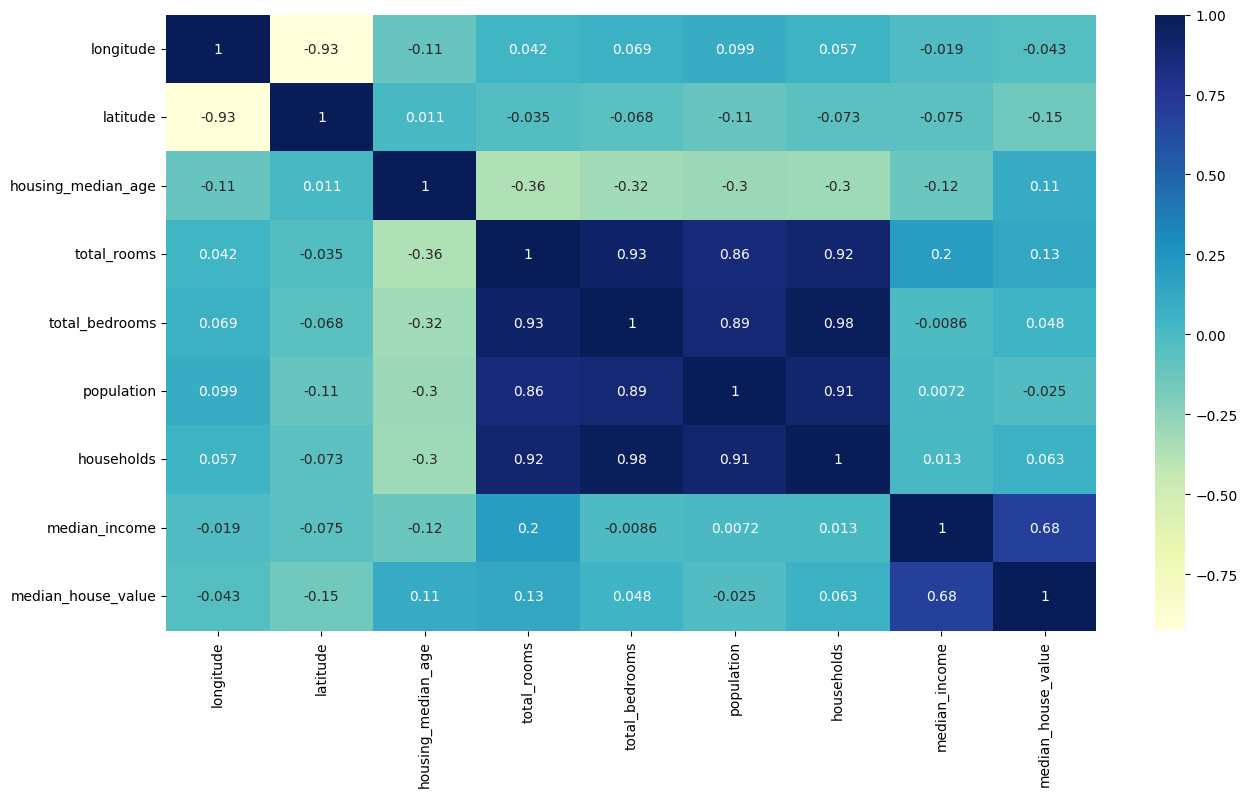

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    df_train.select_dtypes(include=[np.number]).corr(), annot=True, cmap="YlGnBu"
)
plt.show()

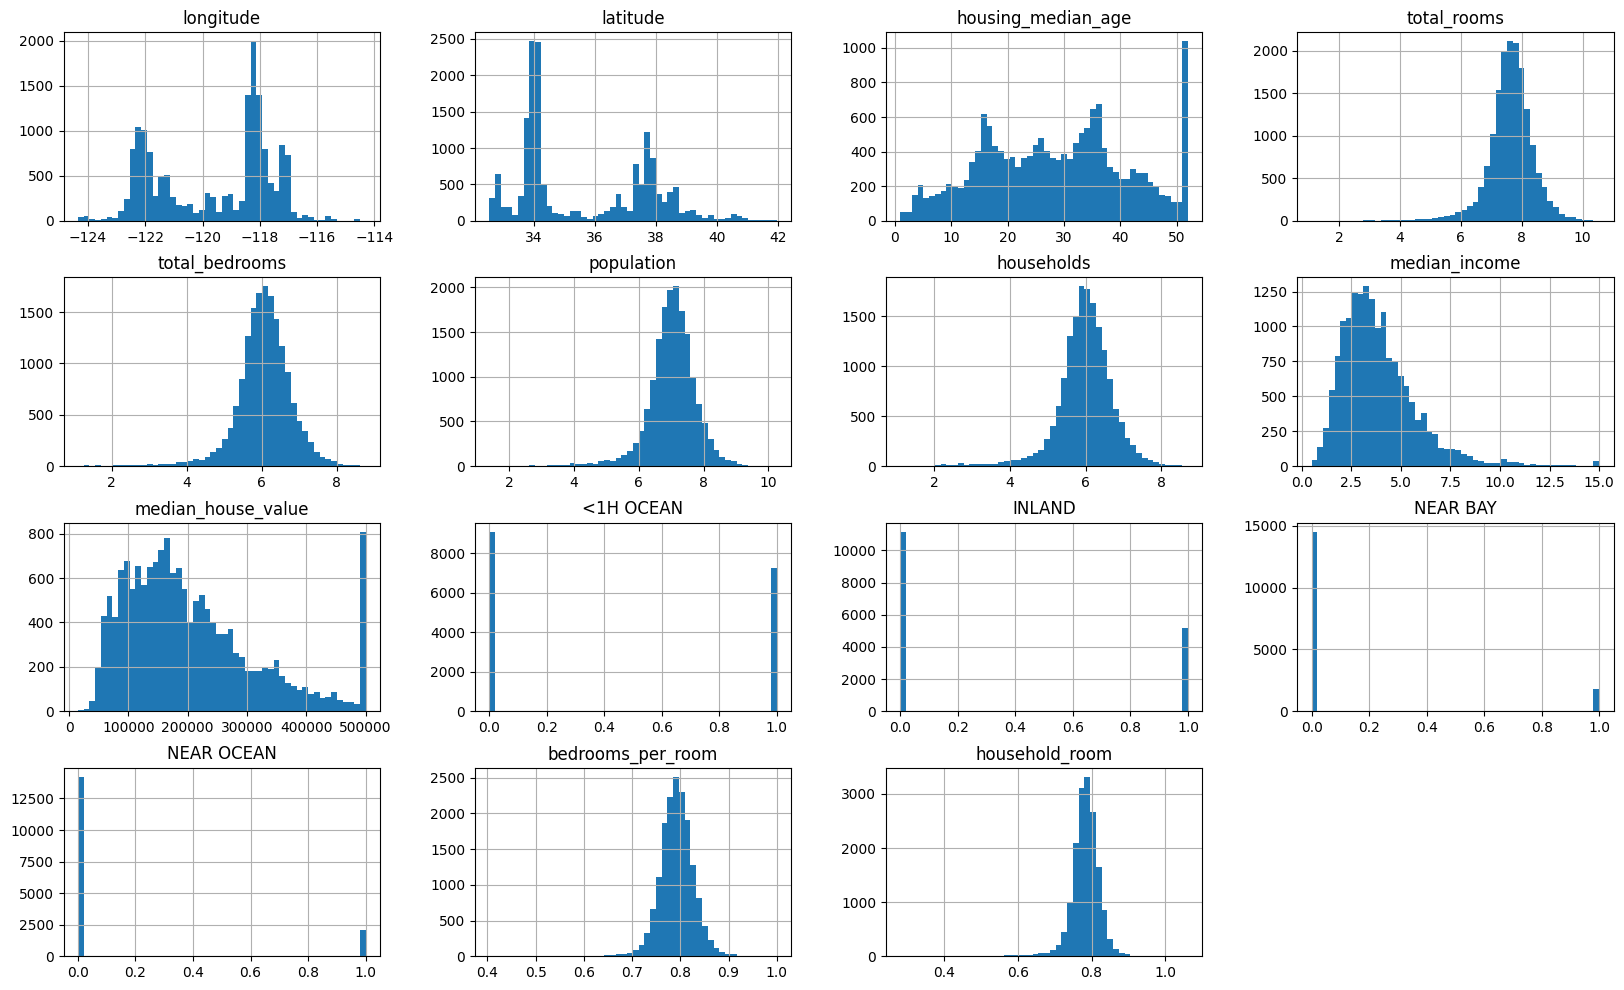

In [17]:
df_train = transform_data(X_train.join(y_train))
df_train.hist(figsize=(20, 12), bins=50)
plt.show()

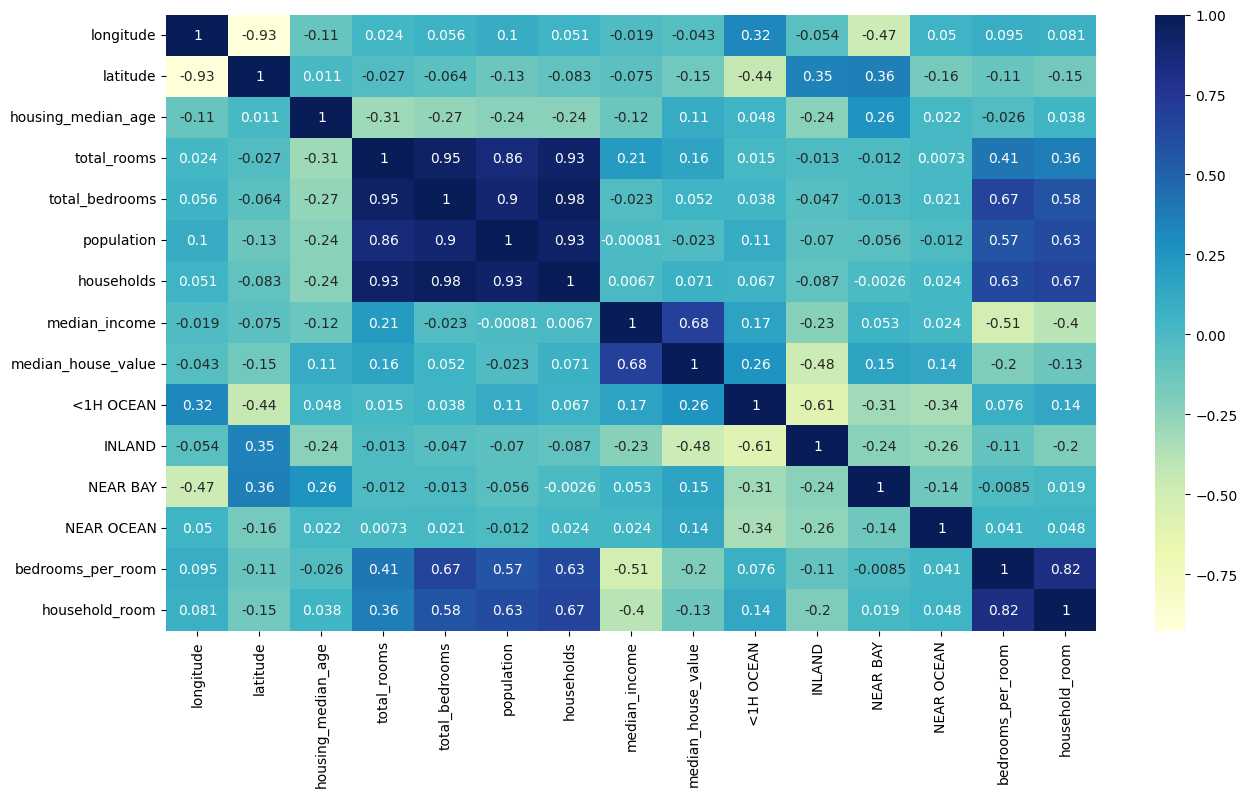

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Model Training

### ScikitLearn

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = (
    df_train.drop("median_house_value", axis=1),
    df_train["median_house_value"],
)
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [20]:
df_test = transform_data(X_test.join(y_test))

In [21]:
X_test, y_test = (
    df_test.drop("median_house_value", axis=1),
    df_test["median_house_value"],
)

In [22]:
X_test_s = scaler.transform(X_test)

In [23]:
reg.score(X_test_s, y_test)

0.6862492788183681

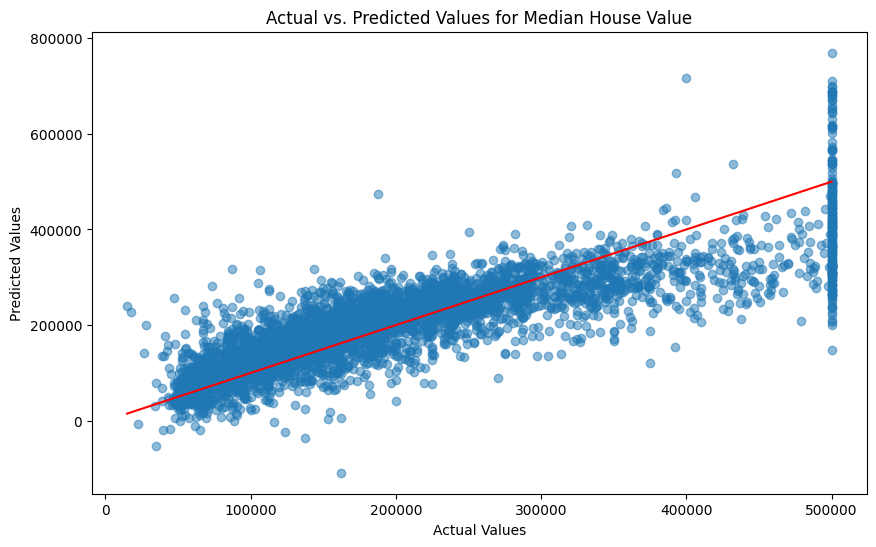

In [24]:
y_pred = reg.predict(X_test_s)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Median House Value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

### Keras

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([Dense(1, input_dim=X_train_s.shape[1])])
model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(X_train_s, y_train, epochs=10, verbose=0)
y_pred_keras = model.predict(X_test_s)

128/128 [==============================] - 0s 2ms/step


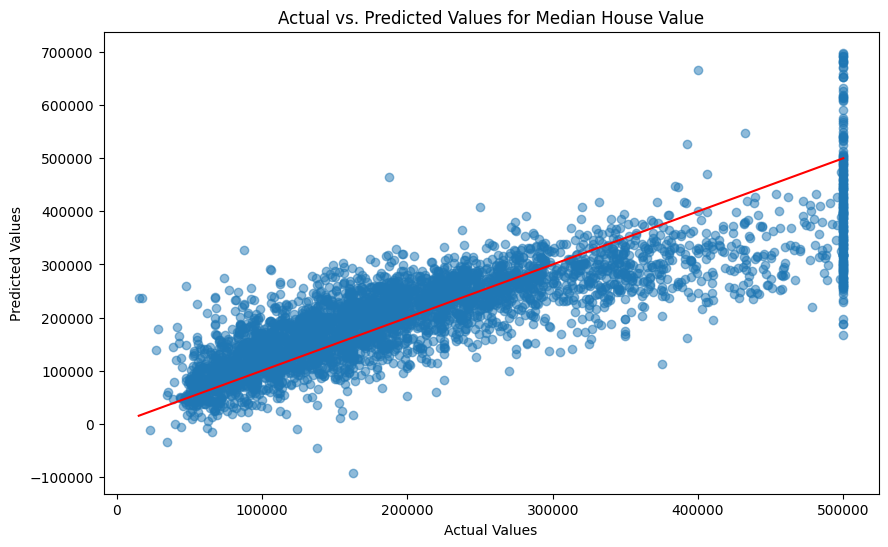

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_keras, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Median House Value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()